In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it


228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
data_dir

'./datasets/flower_photos'

In [6]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [7]:
len(list(data_dir.glob('*/*.jpg')))

0

In [8]:
print(data_dir.resolve())



/content/datasets/flower_photos


In [9]:
print([p.name for p in data_dir.iterdir() if p.is_dir()])


['flower_photos']


In [10]:
from pathlib import Path

data_dir = Path("/content/datasets/flower_photos/flower_photos")


In [11]:
image_files = list(data_dir.glob("*/*.jpg"))
print(len(image_files))



3670


In [12]:
roses=list(data_dir.glob('roses/*'))
roses[:3]

[PosixPath('/content/datasets/flower_photos/flower_photos/roses/15949087094_a8f565295c_m.jpg'),
 PosixPath('/content/datasets/flower_photos/flower_photos/roses/14494590921_3bb1dc7b88_n.jpg'),
 PosixPath('/content/datasets/flower_photos/flower_photos/roses/15738649506_2b4c2fd933_m.jpg')]

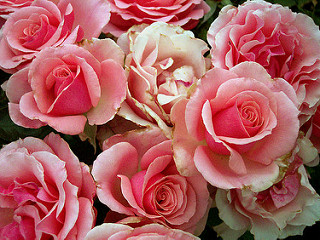

In [13]:
PIL.Image.open(str(roses[1]))

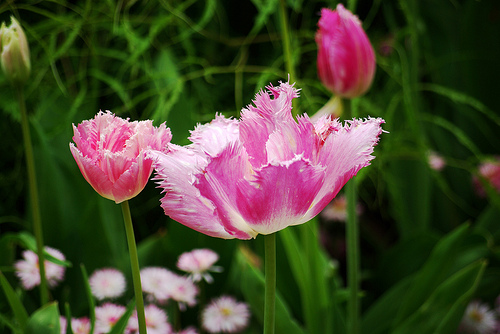

In [14]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [15]:
flowers_images_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflower':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}

In [16]:
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflower':3,
    'tulips':4,
}

In [17]:
flowers_images_dict['roses'][:3]

[PosixPath('/content/datasets/flower_photos/flower_photos/roses/15949087094_a8f565295c_m.jpg'),
 PosixPath('/content/datasets/flower_photos/flower_photos/roses/14494590921_3bb1dc7b88_n.jpg'),
 PosixPath('/content/datasets/flower_photos/flower_photos/roses/15738649506_2b4c2fd933_m.jpg')]

In [18]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 159, 3)

In [19]:
cv2.resize(img,(180,180)).shape


(180, 180, 3)

In [20]:
X,y=[],[]

for flower_name,images in flowers_images_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,(180,180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])


In [21]:
X=np.array(X)
y=np.array(y)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [23]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [24]:
num_classes=5
model=Sequential([
    layers.Conv2D(16,3,padding="same",activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding="same",activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding="same",activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.3132 - loss: 1.5580
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5591 - loss: 1.0845
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6620 - loss: 0.8858
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7701 - loss: 0.6350
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8596 - loss: 0.4134
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9235 - loss: 0.2482
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9632 - loss: 0.1293
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9821 - loss: 0.0744
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9874 - loss: 0.0496
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9902 - loss: 0.0464


In [25]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6081 - loss: 2.1164


[2.0383708477020264, 0.6187363862991333]

In [26]:
prediction=model.predict(X_test_scaled)
prediction

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


array([[  7.0802536 ,  13.848773  ,  -0.5753378 , -20.133627  ,
         -5.672238  ],
       [  5.0303817 ,   2.0509293 ,  -4.1703835 ,  -4.422295  ,
          7.662036  ],
       [ -6.154702  ,   4.6731973 ,  10.4829235 , -15.500014  ,
         -1.5960523 ],
       ...,
       [  2.9449866 ,  -4.059127  ,  -0.990714  ,   7.584744  ,
          1.0349339 ],
       [  1.7151556 ,  -1.4844252 ,  -0.56433326,  -0.9990015 ,
          4.960384  ],
       [ -3.5314124 ,  -7.542505  ,   4.147414  ,   6.5496492 ,
          0.81969845]], dtype=float32)

In [27]:
score=tf.nn.softmax(prediction[0])

In [28]:
np.argmax(score)

np.int64(1)

In [33]:
img_height=180
img_width=180

In [34]:
from tensorflow import keras
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

data_augmentation = keras.Sequential([
    RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    RandomRotation(0.1),
    RandomZoom(0.1),
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


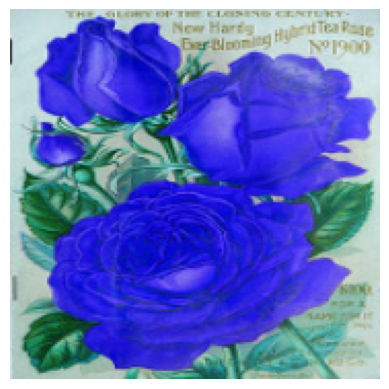

In [35]:
plt.axis('off')
plt.imshow(X[0])

training sample using data augmentation

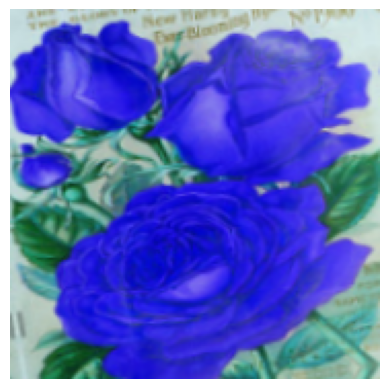

In [36]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

train our model using data augmentation samples and drop some out layer


In [38]:
num_classes=5

model=Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.4091 - loss: 1.4237
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.5861 - loss: 1.0246
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6380 - loss: 0.9244
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.6805 - loss: 0.8305
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6990 - loss: 0.7811
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.7138 - loss: 0.7473
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7298 - loss: 0.6801
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7208 - loss: 0.6985
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7603 - loss: 0.6259
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.7663 - loss: 0.6227


In [39]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6541 - loss: 0.9769


[0.9384229779243469, 0.655773401260376]